In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
filepath = "input.csv"

df = pd.read_csv(filepath, index_col = 0)
df = df.dropna(thresh=8) # drop rows with NaN values in any column
df = df.sample(frac=1) # shuffle the rows
df.head()

,Regressor,Var1,Var2,Var3,Var4,Var5,Var6,Var7
Sl.No,,,,,,,,
84,22.0,4,121.0,76.0,2511,18.0,72,2
259,19.2,6,231.0,105.0,3535,19.2,78,1
90,28.0,4,98.0,80.0,2164,15.0,72,1
249,21.5,4,121.0,110.0,2600,12.8,77,2
185,23.0,4,120.0,88.0,2957,17.0,75,2


In [3]:
# assuming Y is always the column next to index

Y = df.iloc[:,0].copy().values
X = df.iloc[:,1:].copy().values

no_x = X.shape[1] # no of independent variables

limit = 70*df.shape[0]//100 # for selecting 70% of data

Y_train = np.array(Y[:limit])
Y_test = np.array(Y[limit:])

X = np.transpose(X)
X = np.array([(i - np.mean(i))/(np.max(i)-np.min(i)) for i in X]) # normalising

X = np.transpose(X)
X_train = np.transpose(X[:limit])
X_test = np.transpose(X[limit:])

In [ ]:
def plot_error(error):
    plt.plot(range(len(error)),error, color="red")
    plt.title("error vs iteration")
    plt.show()

In [12]:
def SGD(w, learning_rate, momentum = 0, epochs=10):
    
    dw = np.zeros(len(w))
    error = []
    sum_dL = np.zeros(len(w))
    
    for epoch in range(epochs):
        for i in range(limit):
            Y_ = np.matmul(W,X_train)
            mse = np.mean((Y_train-Y_)**2)
            error.append(mse)
            dL_dw = np.array([ 2*(Y_train[i] - Y_[i])*x_j[i] for x_j in X_train]) 
            
            # update term
            dw = learning_rate*dL_dw + momentum*dw
            w += dw
            
        plot_error(error)
        return w, error

In [36]:
def Adagrad(w, learning_rate, epochs=1000):
    
    dw = np.zeros(len(w))
    error = []
    sum_dL = np.zeros(len(w))
    
    for epoch in range(epochs):
        for i in range(limit):
            Y_ = np.matmul(w,X_train)
            mse = np.mean((Y_train-Y_)**2)
            error.append(mse)
            dL_dw = np.array([ 2*(Y_train[i] - Y_[i])*x_j[i] for x_j in X_train])
            
            # update term
            sum_dL += dL_dw**2
            dw = learning_rate*dL_dw*(sum_dL**-1)
            w += dw
            
    plot_error(error)
    return w, error

In [58]:
def RMSprop(w, learning_rate, epochs=10):
    
    dw = np.zeros(len(w))
    error = []
    sum_dL = np.zeros(len(w))
    
    for epoch in range(epochs):
        for i in range(limit):
            Y_ = np.matmul(w,X_train)
            mse = np.mean((Y_train-Y_)**2)
            error.append(mse)
            dL_dw = np.array([ 2*(Y_train[i] - Y_[i])*x_j[i] for x_j in X_train])
            
            # update term
            sum_dL = 0.9*sum_dL + 0.1*dL_dw**2
            dw = learning_rate*dL_dw*(sum_dL**-1)
            w += dw
            
    plot_error(error)
    return w, error

In [6]:
Y_ = np.matmul(W, X_test)
test_error = np.mean((Y_test - Y_)**2)
print("test_error : "+str(test_error))

test_error : 561.527276108


In [4]:
learning_rate = 1
error = []
W = np.zeros(no_x)

for _ in range(1000):
    
    Y_ = np.matmul(W, X_train)
    
    mse = np.mean((Y_train - Y_)**2)
    error.append(mse) # for plotting

    ct = 2*(Y_train - Y_) # common term in derivative
    
    dL_dw = np.array([ np.mean(ct*x_js) for x_js in X_train]) 
    
    W =  W + learning_rate*dL_dw

print("train_error : "+str(mse))
print("weights : "+str(W))

train_error : 565.305163487
weights : [  8.74191665 -11.3515219   19.28223518 -33.93018456  10.6118113
   9.64508625   2.31117653]


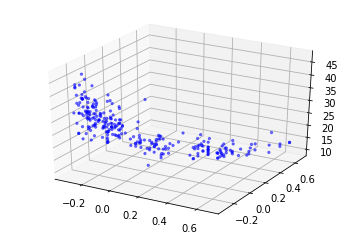

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)
x1, x2 = np.meshgrid(x1,x2)
# z = ?

ax.scatter(X_train[1], X_train[2], Y_train, color= 'b', marker=".",alpha= 0.5)
# ax.plot_surface(x1, x2, z, color= 'r', alpha= 0.5)

plt.show()